# morar

Morar is a python package for working with phenotypic screening data.

The main functionalities are:
- aggregation
    - `morar.aggregate`
- normalisation
    - `morar.normalise`
- outlier detection
    - `morar.outliers`
- scaling and transformation
    - `morar.stats`
- feature selection
    - `morar.feature_selection`

--------------------

Here's a quick example using a small dataset.

In [1]:
import morar
from morar import utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("bmh")

df = pd.read_csv("Cells.csv", index_col=0)

df.head()

,Image_ImageNumber,Cells_ObjectNumber,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1,Nuclei_Location_CenterMassIntensity_X_W1,Nuclei_Location_CenterMassIntensity_Y_W1,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_MaxIntensity_X_W1,Nuclei_Location_MaxIntensity_Y_W1,Nuclei_Number_Object_Number,Nuclei_Parent_all_Nuclei
0,1,1,DMSO,0,CPAP53,6119,1,A01,7313,484.0,...,0.030142,0.113756,477.106255,106.740969,477.013191,107.067211,467.0,102.0,1,2
1,1,2,DMSO,0,CPAP53,6119,1,A01,6723,853.0,...,0.045302,0.133967,838.845837,118.659716,839.199873,118.364099,843.0,117.0,2,4
2,1,3,DMSO,0,CPAP53,6119,1,A01,2545,1318.0,...,0.035619,0.129328,1324.608108,117.337268,1325.196589,116.834829,1319.0,119.0,3,5
3,1,4,DMSO,0,CPAP53,6119,1,A01,5248,283.0,...,0.043820,0.125116,275.575344,123.275219,275.639344,123.156041,282.0,127.0,4,6
4,1,5,DMSO,0,CPAP53,6119,1,A01,6290,1376.0,...,0.046839,0.166781,1350.628682,127.885598,1350.507418,128.442136,1354.0,131.0,5,7


## 1. Aggregating data

Here our dataset contains a row of measurements (features) per cell. Instead of cell-level data we want to work with an average for each image.
We can use `aggregate()` in the `morar.aggregate` module.

Lets look at the raw data:

In [2]:
print("{} rows\n{} columns".format(df.shape[0], df.shape[1]))

3115 rows
216 columns


In [3]:
num_imagesets = len(set(df.Image_ImageNumber))
print("There are {} individual images.".format(num_imagesets))

There are 27 individual images.


So let's aggregate this data to a row per image.


In [4]:
from morar.aggregate import aggregate

df_agg = aggregate(df, on="Image_ImageNumber")

df_agg

,Image_ImageNumber,Cells_ObjectNumber,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1,Nuclei_Location_CenterMassIntensity_X_W1,Nuclei_Location_CenterMassIntensity_Y_W1,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_MaxIntensity_X_W1,Nuclei_Location_MaxIntensity_Y_W1,Nuclei_Number_Object_Number,Nuclei_Parent_all_Nuclei
0,1,105.0,DMSO,0,CPAP53,6119,1,A01,6796.0,923.0,...,0.036035,0.132189,927.731776,1201.224419,927.707986,1201.323602,925.0,1198.0,105.0,110.0
1,2,49.0,DMSO,0,CPAP53,6119,2,A01,7422.0,1230.0,...,0.039605,0.141695,1249.879405,1169.099864,1250.249505,1169.113710,1239.0,1165.0,49.0,56.0
2,3,52.5,DMSO,0,CPAP53,6119,3,A01,6432.5,963.0,...,0.039588,0.129374,950.539795,1428.215007,950.717535,1430.089532,955.5,1435.5,52.5,59.5
3,4,51.5,DMSO,0,CPAP53,6119,4,A01,6263.5,1266.0,...,0.037468,0.132813,1277.389868,1231.562547,1277.587632,1231.589126,1276.0,1234.0,51.5,61.5
4,5,39.5,DMSO,0,CPAP53,6119,5,A01,6216.0,767.5,...,0.039321,0.125675,762.279177,710.043582,762.857434,709.953877,759.0,705.5,39.5,44.5
5,6,26.0,DMSO,0,CPAP53,6119,6,A01,6134.0,1120.0,...,0.045760,0.152743,1147.642579,1165.452801,1147.276786,1165.067513,1148.0,1171.0,26.0,28.0
6,7,21.0,DMSO,0,CPAP53,6119,7,A01,7344.0,1529.0,...,0.041010,0.151797,1556.727786,1300.078135,1556.366352,1299.968095,1571.0,1298.0,21.0,25.0
7,8,18.0,DMSO,0,CPAP53,6119,8,A01,7126.0,1051.0,...,0.045016,0.150637,1057.121699,1068.541929,1057.771817,1069.051282,1047.0,1065.0,18.0,21.0
8,9,19.0,DMSO,0,CPAP53,6119,9,A01,6337.0,1038.0,...,0.049850,0.151770,1043.545146,1178.554318,1043.908010,1178.325864,1039.0,1181.0,19.0,20.0
9,10,58.0,DMSO,0,FLO1,6116,1,A01,8152.0,1233.0,...,0.062541,0.215869,1215.316678,682.726382,1214.871247,682.258126,1221.0,682.0,58.0,62.0


We see that the feature data is aggregated, while the metadata is collapsed to the same aggregation level.

Though, we might want to aggregate per well on each plate. We can pass a list of columns to aggregate on.

In [5]:
aggregate(df, on=["Metadata_well", "Metadata_platename"])

,Image_ImageNumber,Cells_ObjectNumber,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1,Nuclei_Location_CenterMassIntensity_X_W1,Nuclei_Location_CenterMassIntensity_Y_W1,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_MaxIntensity_X_W1,Nuclei_Location_MaxIntensity_Y_W1,Nuclei_Number_Object_Number,Nuclei_Parent_all_Nuclei
0,3.0,44.5,DMSO,0,CPAP53,6119,1,A01,6659.5,985.5,...,0.039872,0.136389,980.967367,1177.118117,982.066808,1177.222936,983.0,1173.0,44.5,50.0
1,12.0,38.0,DMSO,0,FLO1,6116,1,A01,7297.0,1196.5,...,0.069057,0.221981,1199.855273,903.149090,1199.356732,902.744431,1197.5,903.5,38.0,41.0
2,24.0,108.0,DMSO,0,KYSE30,6114,1,A01,5910.0,1138.0,...,0.000534,0.010147,1146.879080,1141.050863,1147.479979,1140.705239,1144.0,1148.0,108.0,113.0


We can choose which method we use to average the group with the `method` argument. The default is the median.

In [6]:
aggregate(df, on="Image_ImageNumber", method="mean").head()

,Image_ImageNumber,Cells_ObjectNumber,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1,Nuclei_Location_CenterMassIntensity_X_W1,Nuclei_Location_CenterMassIntensity_Y_W1,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_MaxIntensity_X_W1,Nuclei_Location_MaxIntensity_Y_W1,Nuclei_Number_Object_Number,Nuclei_Parent_all_Nuclei
0,1,105.0,DMSO,0,CPAP53,6119,1,A01,7095.488038,952.870813,...,0.037858,0.133673,952.714198,1168.583292,952.800997,1168.584514,952.157895,1168.354067,105.0,109.913876
1,2,49.0,DMSO,0,CPAP53,6119,2,A01,7693.577320,1159.278351,...,0.043859,0.148800,1158.901661,1136.082216,1158.931113,1136.055451,1159.690722,1135.680412,49.0,56.340206
2,3,52.5,DMSO,0,CPAP53,6119,3,A01,6405.163462,1005.750000,...,0.034800,0.109814,1003.863792,1278.866759,1004.066455,1278.889747,1003.240385,1278.192308,52.5,58.913462
3,4,51.5,DMSO,0,CPAP53,6119,4,A01,6441.450980,1025.470588,...,0.036704,0.125128,1026.392917,1200.674902,1026.405541,1200.554125,1024.333333,1200.000000,51.5,60.490196
4,5,39.5,DMSO,0,CPAP53,6119,5,A01,6386.179487,1056.230769,...,0.037869,0.119147,1052.606531,839.101047,1052.410062,839.185656,1053.192308,839.910256,39.5,43.730769


## 2. normalising data

In highthroughput experiments we often have batch effects from plate-to-plate or between different weeks. We therefore want to minimise these. The standard method in screening is to normalise each feature to the average of the negative control wells per plate.

The recommended method is the robust normalisation method that uses the median of negative controls and divides by the median absolute deviation, although we can also subtract or divide by the negative control values.

Lets see that the cell areas of each plate are largely different in the unnormalised state (due to different cell lines), i.e the FLO1 cell line have larger cells than the other two.

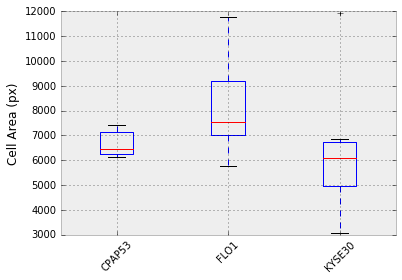

In [7]:
from morar.normalise import robust_normalise
from morar.normalise import normalise

grouped = df_agg.groupby("Metadata_platename", as_index=False)

names, vals = [], []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals.append(tmp)
    names.append(name)
    
plt.figure()
plt.boxplot(vals)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell Area (px)")
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

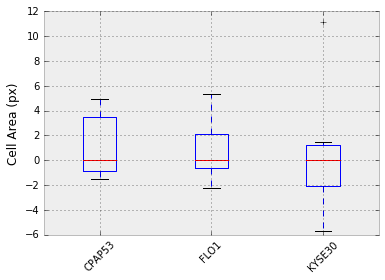

In [8]:
df_agg = robust_normalise(df_agg, plate_id="Metadata_platename")

grouped = df_agg.groupby("Metadata_platename", as_index=False)

names, vals = [], []
for name, group in grouped:
    tmp = group.Cells_AreaShape_Area.values.tolist()
    vals.append(tmp)
    names.append(name)
    
plt.figure()
plt.boxplot(vals)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Cell Area (px)")
_, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## 3. outlier detection

We can detect outlying values, based on a robust hampel filter of the feature data.

In [9]:
from morar.outliers import get_outlier_index

bad_img = get_outlier_index(df_agg, sigma=20)

/home/scott/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


This returns the index of outlying rows based on their feature measurements.

In [10]:
df_agg.iloc[bad_img]

,Image_ImageNumber,Cells_ObjectNumber,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1,Nuclei_Location_CenterMassIntensity_X_W1,Nuclei_Location_CenterMassIntensity_Y_W1,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Nuclei_Location_MaxIntensity_X_W1,Nuclei_Location_MaxIntensity_Y_W1,Nuclei_Number_Object_Number,Nuclei_Parent_all_Nuclei
21,-0.7413,-8.575038,DMSO,0,KYSE30,6114,4,A01,-5.701504,8.201617,...,178.598114,38.005461,7.901357,5.940242,7.891582,5.943074,9.178408,5.570759,-8.575038,-6.561294


In [11]:
df_agg.drop(bad_img, inplace=True)

## 4. scaling and transforming features

We can z_score all feature values.

In [12]:
from morar.stats import scale_features

scaled_df = scale_features(df_agg)

We can also perform a generalised logarithmic transform to make features more normally distributed, which can sometimes be useful for certain statistical and machine learning methods.

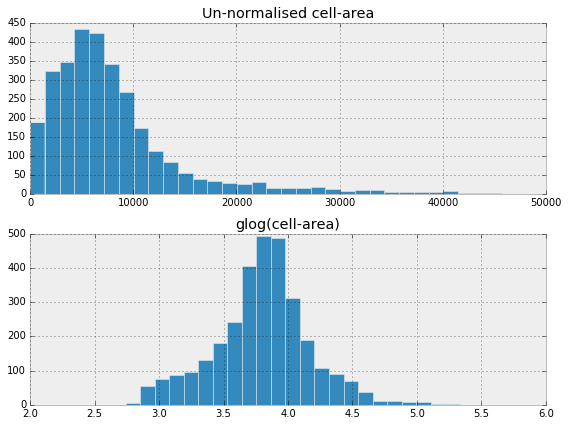

In [13]:
from morar.stats import glog

cell_area = df.Cells_AreaShape_Area
norm_cell_area = glog(df.Cells_AreaShape_Area)

plt.figure(figsize=[8,6])
plt.subplot(211)
plt.title("Un-normalised cell-area")
plt.hist(cell_area, bins=150)
plt.xlim([0,50000])

plt.subplot(212)
plt.title("glog(cell-area)")
plt.hist(norm_cell_area, bins=50)
plt.xlim([2, 6])

plt.tight_layout()
plt.show()

## 5. feature selection

To identify features with little or zero variance, use `feature_selection.find_low_var`. This returns a list of columns with variance less than the threshold (default = 1e-5).

### 5.1 low variance features

In [14]:
from morar import feature_selection

feature_selection.find_low_var(df)

['Cells_AreaShape_Zernike_8_8',
 'Cells_AreaShape_Zernike_9_1',
 'Cells_AreaShape_Zernike_9_3',
 'Cells_AreaShape_Zernike_9_5',
 'Cells_AreaShape_Zernike_9_7',
 'Cells_AreaShape_Zernike_9_9',
 'Cells_Intensity_MinIntensityEdge_W3',
 'Cells_Intensity_MinIntensity_W3',
 'Nuclei_AreaShape_Zernike_8_8',
 'Nuclei_AreaShape_Zernike_9_1',
 'Nuclei_AreaShape_Zernike_9_3',
 'Nuclei_AreaShape_Zernike_9_5',
 'Nuclei_AreaShape_Zernike_9_9']

In [15]:
low_var_features = feature_selection.find_low_var(df, threshold=1e-4)
df.drop(low_var_features, axis=1, inplace=True)

### 5.2 highly correlated features

Many features are highly correlated with one another, and all but one of these can be removed without losing much information. To return a list of highly correlated features to remove use `feature_selection.find_correlation`. The correlation threshold can be adjusted.

In [16]:
high_corr_features = feature_selection.find_correlation(df, threshold=0.99)
high_corr_features

['Cells_Neighbors_SecondClosestObjectNumber_Adjacent',
 'Cells_Number_Object_Number',
 'Cells_Parent_Nuclei',
 'Cells_Parent_all_Nuclei',
 'Nuclei_Number_Object_Number',
 'Nuclei_Parent_all_Nuclei',
 'Cells_ObjectNumber',
 'Cells_Location_CenterMassIntensity_X_W3',
 'Cells_Location_CenterMassIntensity_X_W4',
 'Cells_Location_CenterMassIntensity_X_W5',
 'Cells_Location_Center_X',
 'Cells_Location_MaxIntensity_X_W2',
 'Cells_Location_MaxIntensity_X_W3',
 'Cells_Location_MaxIntensity_X_W4',
 'Cells_Location_MaxIntensity_X_W5',
 'Nuclei_AreaShape_Center_X',
 'Nuclei_Location_CenterMassIntensity_X_W1',
 'Nuclei_Location_Center_X',
 'Nuclei_Location_MaxIntensity_X_W1',
 'Cells_AreaShape_Center_X',
 'Cells_Location_CenterMassIntensity_Y_W3',
 'Cells_Location_CenterMassIntensity_Y_W4',
 'Cells_Location_CenterMassIntensity_Y_W5',
 'Cells_Location_Center_Y',
 'Cells_Location_MaxIntensity_Y_W2',
 'Cells_Location_MaxIntensity_Y_W3',
 'Cells_Location_MaxIntensity_Y_W4',
 'Cells_Location_MaxIntensit

In [17]:
df.drop(high_corr_features, axis=1, inplace=True)

### 5.3 feature importance

We can also identify and rank features which are useful based on their ability to separate two treatments.

This dataset only contains DMSO treatments, so we will have to create some artifical data, containing 10 features (`x1` to `x10`), 3 of which are informative for separating two classes (`pos` and `neg`).

In [18]:
from sklearn.datasets import make_classification

# create artifical data with two classes and 3 meaningful features, 7 noisy features
x, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_classes=2,
                           n_redundant=0,
                           n_informative=3)
x = pd.DataFrame(x)


def replace_binary(x):
    """ replace y binary classes with compound labels """
    if x == 1:
        return "pos"
    elif x == 0:
        return "neg"
    
cmpd = [replace_binary(i) for i in y]
x.columns = ["x"+str(i)for i in range(1,11)]
x["Metadata_compound"] = cmpd
x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Metadata_compound
0,0.768386,-0.310130,2.346074,-0.866495,0.187148,-0.218457,0.695796,-0.168761,0.327551,-0.362779,neg
1,0.186313,-1.591493,0.058506,0.307026,0.393173,1.427142,-0.105925,-1.039593,-1.657545,-1.460162,neg
2,-0.372579,0.580502,1.368675,-0.977141,0.384800,0.189623,-1.998898,-1.403184,-0.740690,0.477757,neg
3,1.102387,0.214310,-2.444832,-1.546929,-0.833717,-1.190589,-1.357893,-0.740990,2.498972,0.244707,neg
4,-0.280507,-0.331031,-0.905258,1.081346,-0.916176,0.851469,0.477942,-0.809205,-0.840682,-0.392537,pos


Now lets find the importance of the features using `feature_selection.feature_importance`.

In [19]:
out = feature_selection.feature_importance(
    data=x,
    neg_cmpd="neg",
    pos_cmpd="pos",
    compound_col="Metadata_compound")

out

[['x1', 0.034676247681359081],
 ['x2', 0.034044423217812085],
 ['x3', 0.62143941757968013],
 ['x4', 0.033161332042682005],
 ['x5', 0.032502369283213449],
 ['x6', 0.033414138396336231],
 ['x7', 0.02909885244056104],
 ['x8', 0.055683639730111034],
 ['x9', 0.091081236681863451],
 ['x10', 0.03489834294638141]]

We can rank these features by their importance, using `sort=True`.

In [20]:
out = feature_selection.feature_importance(
    data=x,
    neg_cmpd="neg",
    pos_cmpd="pos",
    compound_col="Metadata_compound",
    sort=True)

out

[['x3', 0.63460663704554043],
 ['x9', 0.089940269901537251],
 ['x8', 0.053689410668170914],
 ['x5', 0.03321297560454893],
 ['x4', 0.032663292116223361],
 ['x6', 0.032383426937759766],
 ['x2', 0.032313906430602946],
 ['x1', 0.031328994938057311],
 ['x7', 0.031133164332258868],
 ['x10', 0.028727922025300206]]

Now let's plot the features and their importance values.

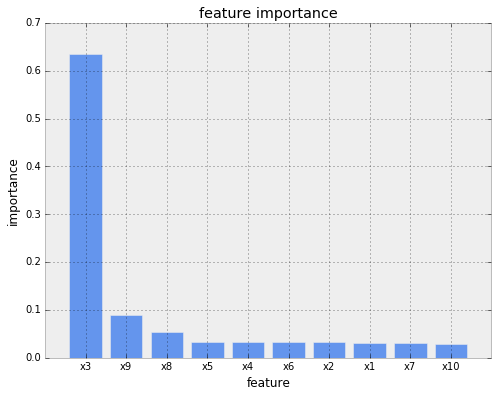

In [21]:
feature, imp = zip(*out)

plt.figure(figsize=[8,6])
plt.title("feature importance")
plt.ylabel("importance")
plt.xlabel("feature")
plt.bar(range(len(imp)), imp, align="center", color="cornflowerblue")
plt.xticks(range(len(imp)), feature)
plt.xlim([-1, len(imp)])
plt.show()

### 5.4 feature selection

We can also automatically select meaningful features that separate positive and negative controls using separation in a linear L1 SVC. `C` is a sparsity argument, the lower the value of C the more discerning the algorithm is at returning features.

So, using the same artifical dataset:

In [22]:
feature_selection.select_features(x, "pos", "neg", C=0.001)

['x3', 'x9']

In [23]:
# return fewer features
feature_selection.select_features(x, "pos", "neg", C=0.0001)

['x3']